### NOXOLO FELICIA VILAKAZI

# Language Identification Identification

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

<a id="cont"></a>

# Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#two>3. Understand the Data</a>

<a href=#three>4. Exploratory Data Analysis (EDA)</a>

<a href=#three>3. Clean Data </a>

<a href=#four>5. Data Engineering</a>

<a href=#five>6. Modeling</a>

<a href=#six>7. Model Performance</a>


## Importing Packages

In [20]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import nltk

# Libraries for data preparation and model building
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from nltk.stem import PorterStemmer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier,ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## Loading Data

In [2]:
#reading the train set 
train_df=pd.read_csv('train_set.csv')
#reading the train set 
test_df=pd.read_csv('test_set.csv')

# Understand dataset
It allows you to understand the relationship between the features and the target variable. It also helps you understand what features are irrelevant for the model.

In [3]:
#displaying the first rows
train_df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


Checking the number of languages we have in the dataset and how many sentances does each category consist

In [4]:
# There are 11 languages and 3000 sentenses in each category
train_df["lang_id"].value_counts() 

lang_id
xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: count, dtype: int64

each language consist of 300 sentances

# Exploratory Data Analysis(EDA)

checking also the datatype of our data

In [5]:
# Verifying the data types and establishing if there are null values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


looking for the shape of the train and test data

In [6]:
train_df.shape

(33000, 2)

In [7]:
test_df.shape

(5682, 2)

**Analysis of the language distribution in the dataset and pie chart**

In [18]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 8
plt.rcParams["figure.figsize"] = plot_size 

# Distribution of sentences from the dataset
train_df.lang_id.value_counts().plot(kind='bar', autopct='%1.0f%%')
plt.title('Distribution of Sentences by Language')
plt.xlabel('Language ID')
plt.ylabel('Count')
plt.show()


6.4
4.8


NameError: name 'train_df' is not defined

As we saw under "understand data" this also prove the that all language categories have equal sentances

C:\Users\Felicia Vilakazi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


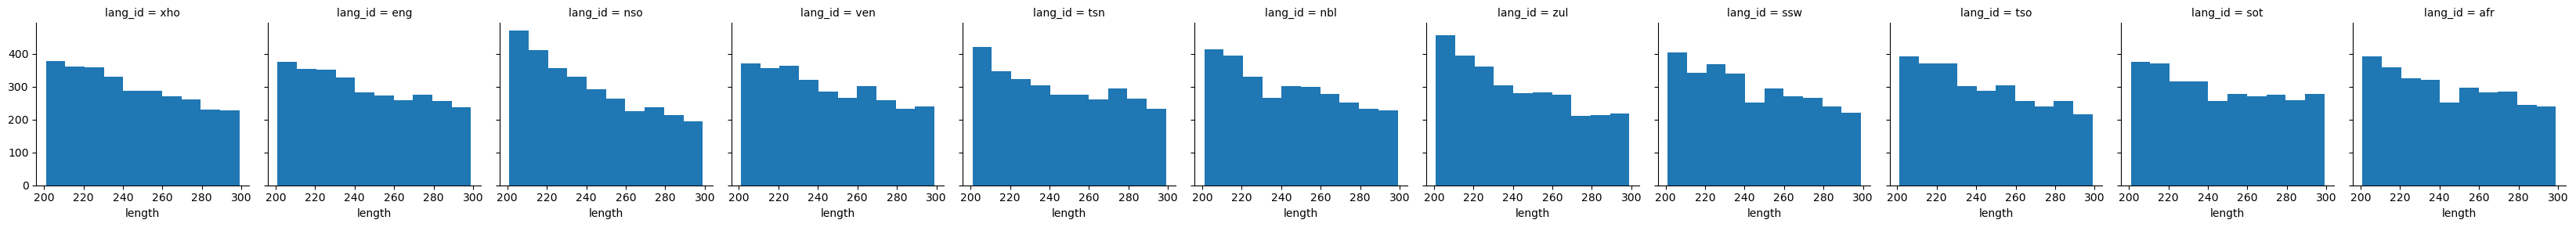

In [9]:
# Understand the feature distributions
# checking the length of each language
train_df['length'] = train_df['text'].str.len()

# Create Subplots for each class
tweet= sns.FacetGrid(train_df,col="lang_id" )
tweet = tweet.map(plt.hist, 'length')
tweet = plt.show()

above we find that each language consist of 300 sentances or words, but when we are looking the length ot each language text we see that they are defferent. this can be caused by the number of spaces in each language text

# Feature Engineering
is the process of tranforming data to increase the predictive  performanceof machine learning models

### Classifying the independent and dependent variables

In [10]:
#text data is the independent variable of the training set
X = train_df["text"] 
#lang_id is the dependent variable of the training set
y = train_df["lang_id"]
#text data is the independent variable of the test set
X_tst = test_df['text'] 

### Text Preprocessing
Cleaning our dataset to remove symbols that will determine the quality of our model. 

#### Cleaning Data

*  Convert words to lower Case  
*  Removing punctuations

####  Convert words to lower Case
All Tweets are converted to lower case because when vectorization of tweets are done, lower and upper case numbers will be treated as different dimensions even thou some words may hold the same meaning. E.g. Zanele and zanele mean the same thing but will be considered different features when vectorized

#### Removing punctuations
Puncuations are removed because it is considered as noise and does not add value to features created

In [11]:
# creating a list for appending the preprocessed text
datafm_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        datafm_list.append(text)

In [12]:
# creating a list for appending the preprocessed text in the text data set
datafm_list1 = []
# iterating through all the text
for text in X_tst:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        datafm_list1.append(text)

C:\Users\Felicia Vilakazi\AppData\Local\Temp\ipykernel_83360\1321412180.py:7: FutureWarning: Possible nested set at position 1
  text = re.sub(r'[[]]', ' ', text)


### Vectorization
is the process of avoiding explicit loops in a code to reduce the execution time.

Our model should take in numerical data.Using CountVectorizer to convert our dataset from text to numerical form.

In [13]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Example: Create a DataFrame 'df' with a column 'text' and 'target'
data = {'text': ['sentence 1', 'sentence 2', 'sentence 3'],
        'target': ['label_A', 'label_B', 'label_A']}

df = pd.DataFrame(data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

# Initialize the CountVectorizer
cv = CountVectorizer()

# Fit and transform the training data
X_train_transformed = cv.fit_transform(X_train)

# Transform the test data using the previously defined CountVectorizer
X_test_transformed = cv.transform(X_test)

# Display the shape of the transformed test data
print("Transformed Test Data Shape:", X_test_transformed.shape)


Transformed Test Data Shape: (1, 1)


### Train Test Splitting

Creating the training set, for training the model

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

#  Modeling


We train our model uisng different models(only 3 used ) from the training set and later predict the output for the test set. using the classification report.

### Random Forest  
Random forest is a bagging technique and not a boosting technique. The trees in random forests run in parallel

In [16]:
# Create Random Forest classifer object
ref_clf = RandomForestClassifier(n_estimators=100)
# Fit/Train Random Forest Classifer on training set
ref_clf.fit(x_train,y_train) 

#predict y labels
y_pred5 = ref_clf.predict(x_test)

#metrics report
acs = accuracy_score(y_test, y_pred5)
#classification report
report = classification_report(y_test,y_pred5)

print("Accuracy is :",acs)
print("Report is :",report)

Accuracy is : 0.9874242424242424
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       0.99      1.00      1.00       574
         nbl       0.98      0.96      0.97       613
         nso       1.00      1.00      1.00       570
         sot       1.00      0.99      1.00       600
         ssw       0.99      0.96      0.98       624
         tsn       0.99      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       0.98      0.98      0.98       621
         zul       0.93      0.97      0.95       634

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



### Logistics Regression
 Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable

In [29]:
# Creating a logistics regression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
#fit the train data
LRmodel.fit(x_train, y_train)
#predict y labels
y_pred2 = LRmodel.predict(x_test)

#metrics report
acs = accuracy_score(y_test, y_pred2)
#classification report
report = classification_report(y_test,y_pred2)

print("Accuracy is :",acs)
print("Report is :",report)

Accuracy is : 0.9953030303030304
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       1.00      1.00      1.00       574
         nbl       0.99      0.99      0.99       613
         nso       1.00      1.00      1.00       570
         sot       1.00      0.99      1.00       600
         ssw       0.99      1.00      0.99       624
         tsn       1.00      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       1.00      0.99      0.99       621
         zul       0.98      0.98      0.98       634

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



### BernoulliNB model
it only describes whether or not an event occurred 

In [30]:
BNBmodel = BernoulliNB()
BNBmodel.fit(x_train, y_train)
y_pred3 = BNBmodel.predict(x_test)

#metrics report
acs = accuracy_score(y_test, y_pred3)
#classification report
report = classification_report(y_test,y_pred3)

print("Accuracy is :",acs)
print("Report is :",report)

Accuracy is : 0.9993939393939394
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       1.00      1.00      1.00       574
         nbl       1.00      1.00      1.00       613
         nso       1.00      1.00      1.00       570
         sot       1.00      1.00      1.00       600
         ssw       1.00      1.00      1.00       624
         tsn       1.00      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       1.00      1.00      1.00       621
         zul       1.00      1.00      1.00       634

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [17]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming x_train, y_train, X_test, y_test are your training and testing data
# Create and train the Bernoulli Naive Bayes model
BNBmodel = BernoulliNB()
BNBmodel.fit(x_train, y_train)

# Make predictions on the test set
y_pred3 = BNBmodel.predict(X_test)

# Metrics report
acs = accuracy_score(y_test, y_pred3)

# Classification report
report = classification_report(y_test, y_pred3)

print("Accuracy is:", acs)
print("Report is:", report)


NameError: name 'x_train' is not defined

Now we are comparing the model perfomance of the models defined above ,which are also  the names of the models appear below

In [34]:
#names of the models perfomed as a list
names = [ 'Random Forest',
         'LogisticRegression', 'BernoulliNB',
         ]

In [35]:
#list of the models
classifiers = [
    RandomForestClassifier(n_estimators=100),
    LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1),
    BernoulliNB()
    ]

In [45]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming you have 'names' and 'classifiers' defined somewhere in your code
# names = [...]  # List of classifier names
# classifiers = [...]  # List of classifier instances

# Sample data to reduce memory usage
sample_size = 1000  # Adjust the sample size as needed
x_train_sample, _, y_train_sample, _ = train_test_split(x_train, y_train, train_size=sample_size, random_state=42)

# Creating the list
results = []

models = {}
confusion = {}
class_report = {}

for name, clf in zip(names, classifiers):
    print('Fitting {:s} model...'.format(name))

    # Check if the data is not empty
    if x_train_sample.shape[0] == 0:
        print('Data is empty for {:s}. Skipping...'.format(name))
        continue

    # Training the model
    clf.fit(x_train_sample, y_train_sample)

    print('... predicting')
    y_pred = clf.predict(x_train_sample)
    y_pred_test = clf.predict(x_test)

    print('... scoring')
    accuracy = metrics.accuracy_score(y_train_sample, y_pred)
    precision = metrics.precision_score(y_train_sample, y_pred, average='weighted', zero_division=1)
    recall = metrics.recall_score(y_train_sample, y_pred, average='weighted', zero_division=1)

    f1 = metrics.f1_score(y_train_sample, y_pred, average='weighted', zero_division=1)
    f1_test = metrics.f1_score(y_test, y_pred_test, average='weighted', zero_division=1)

    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train_sample, y_pred)
    class_report[name] = metrics.classification_report(y_train_sample, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test])

    # Print classification report and confusion matrix
    print('\nClassification Report for {:s}:\n'.format(name))
    print(class_report[name])
    print('\nConfusion Matrix for {:s}:\n'.format(name))
    print(confusion[name])

results_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test'])
results_df.set_index('Classifier', inplace=True)

print('FINISHED!')


Fitting Random Forest model...
... predicting
... scoring

Classification Report for Random Forest:

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00        97
         eng       1.00      1.00      1.00        81
         nbl       1.00      1.00      1.00        74
         nso       1.00      1.00      1.00        87
         sot       1.00      1.00      1.00       105
         ssw       1.00      1.00      1.00        82
         tsn       1.00      1.00      1.00        96
         tso       1.00      1.00      1.00       102
         ven       1.00      1.00      1.00        83
         xho       1.00      1.00      1.00        98
         zul       1.00      1.00      1.00        95

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


Confusion Matrix for Random Forest:

[[ 97   0   0   0   0   0   0   0   0   0   0]
 

C:\Users\Felicia Vilakazi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felicia Vilakazi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felicia Vilakazi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming you have 'names' and 'classifiers' defined somewhere in your code
# names = [...]  # List of classifier names
# classifiers = [...]  # List of classifier instances

# Sample data to reduce memory usage
sample_size = 1000  # Adjust the sample size as needed
x_train_sample, _, y_train_sample, _ = train_test_split(x_train, y_train, train_size=sample_size, random_state=42)

# Creating the list
results = []

models = {}
confusion = {}
class_report = {}

for name, clf in zip(names, classifiers):
    print('Fitting {:s} model...'.format(name))

    # Check if the data is not empty
    if x_train_sample.shape[0] == 0:
        print('Data is empty for {:s}. Skipping...'.format(name))
        continue

    # Training the model
    clf.fit(x_train_sample, y_train_sample)

    print('... predicting')
    y_pred = clf.predict(x_train_sample)
    y_pred_test = clf.predict(x_test)

    print('... scoring')
    accuracy = metrics.accuracy_score(y_train_sample, y_pred)
    precision = metrics.precision_score(y_train_sample, y_pred, average='weighted', zero_division=1)
    recall = metrics.recall_score(y_train_sample, y_pred, average='weighted', zero_division=1)

    f1 = metrics.f1_score(y_train_sample, y_pred, average='weighted', zero_division=1)
    f1_test = metrics.f1_score(y_test, y_pred_test, average='weighted', zero_division=1)

    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train_sample, y_pred)
    class_report[name] = metrics.classification_report(y_train_sample, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test])

    # Print classification report and confusion matrix
    print('\nClassification Report for {:s}:\n'.format(name))
    print(class_report[name])
    print('\nConfusion Matrix for {:s}:\n'.format(name))
    print(confusion[name])

results_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test'])
results_df.set_index('Classifier', inplace=True)

# Sort the DataFrame by 'F1 Train' column
sorted_results_df = results_df.sort_values('F1 Train', ascending=False)

print('FINISHED!')


Fitting Random Forest model...
... predicting
... scoring

Classification Report for Random Forest:

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00        97
         eng       1.00      1.00      1.00        81
         nbl       1.00      1.00      1.00        74
         nso       1.00      1.00      1.00        87
         sot       1.00      1.00      1.00       105
         ssw       1.00      1.00      1.00        82
         tsn       1.00      1.00      1.00        96
         tso       1.00      1.00      1.00       102
         ven       1.00      1.00      1.00        83
         xho       1.00      1.00      1.00        98
         zul       1.00      1.00      1.00        95

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


Confusion Matrix for Random Forest:

[[ 97   0   0   0   0   0   0   0   0   0   0]
 

C:\Users\Felicia Vilakazi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felicia Vilakazi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felicia Vilakazi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model perfomance

In [60]:
# Assuming results is a list of lists
# results = [...]

# Convert the list to a DataFrame
results_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test'])
results_df.set_index('Classifier', inplace=True)

# Sort the DataFrame by 'F1 Train' column
sorted_results_df = results_df.sort_values('F1 Train', ascending=False)

# Display the sorted DataFrame
print(sorted_results_df)


                    Accuracy  Precision  Recall  F1 Train   F1 Test
Classifier                                                         
Random Forest          1.000   1.000000   1.000   1.00000  0.946702
LogisticRegression     1.000   1.000000   1.000   1.00000  0.961257
BernoulliNB            0.206   0.907264   0.206   0.12346  0.104157


we found that accuracy of the BernuolliNB model performance  is the best at 0.9998 indicating our model is performing well.


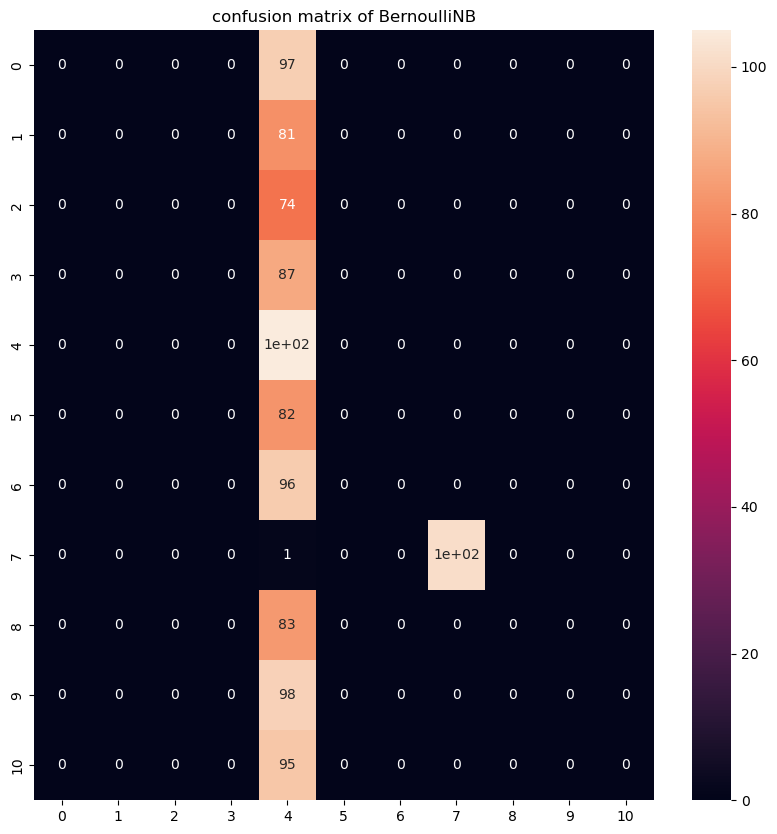

In [50]:
#Ploting the confusion matrix 
plt.figure(figsize=(10,10))
sns.heatmap(confusion['BernoulliNB'], annot = True)
plt.title('confusion matrix of BernoulliNB')
plt.show()

# kaggle submission

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import pandas as pd

# Load your training data
train_df = pd.read_csv('train_set.csv')  # Replace 'train_set.csv' with your actual training data file

# Create and fit the TfidfVectorizer on the training data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['text'])

# Train a Naive Bayes model (MultinomialNB) on the training data
NaiveB = MultinomialNB()

# Replace 'your_actual_target_column_name' with the actual column name containing the class labels
NaiveB.fit(X_train, train_df['lang_id'])

# Load your test data
test_df = pd.read_csv('test_set.csv')  # Replace 'test_set.csv' with your actual test data file

# Converting the test data into TF-IDF vectors using the fitted vectorizer
X_test = vectorizer.transform(test_df['text'])

# Generating predictions on the best-performing model (MultinomialNB)
test_predictions = NaiveB.predict(X_test)


In [36]:
# Creating a submission dataframe with 'index' and 'lang_id' columns
submission_df = pd.DataFrame({'index': test_df['index'], 'lang_id': test_predictions})

submission_df.to_csv('Submission.csv', index=False)